## Multivariate regression

### Data from CSDA

In [1]:
derived = read.table("/Users/gmm/stuff/data/derived.txt", header = TRUE)
derived

Sys,Dia,Age,Hei,Wei
<int>,<int>,<int>,<int>,<int>
115,80,35,163,58
120,80,31,162,58
120,80,22,170,59
110,70,23,164,50
110,70,18,179,58
105,60,28,167,62
150,95,51,163,67
110,75,25,164,54
110,60,22,170,54


In [2]:
library(ggm)
data_ex2 = with(derived, data.frame(X1 =  log(Sys/Dia), X2 = log(Dia), X3 =  100 * Wei/Hei, X4 = Age))
round(apply(data_ex2, 2, mean),2)
S = cov(data_ex2)
sx = sapply(data_ex2, function(x) sd(x) )
round(sx, 2)
round(correlations(S) , 3)

X1    X2    X3    X4 
 0.45  4.29 37.94 29.52

X1    X2    X3    X4 
 0.09  0.13  5.91 10.47

,X1,X2,X3,X4
X1,1.000,-0.566,-0.241,0.300
X2,-0.544,1.000,-0.107,0.491
X3,-0.253,0.336,1.000,0.572
X4,-0.131,0.510,0.608,1.000


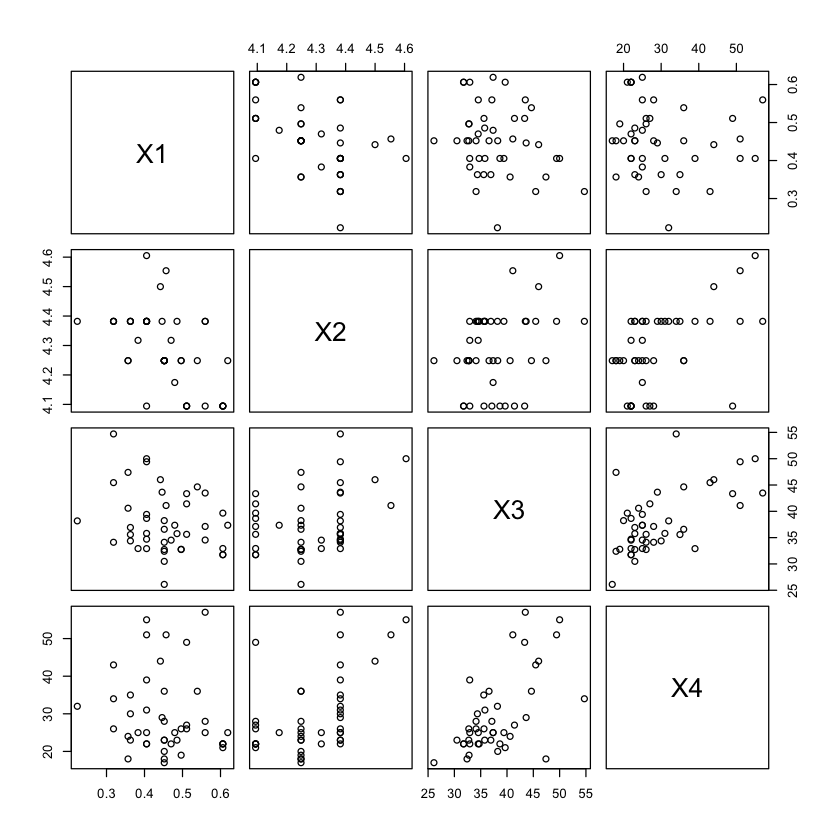

In [3]:
pairs(data_ex2)

In [ ]:
m_sat <- lm(cbind(X1, X2) ~ X3 + X4, data = data_ex2)
summary(m_sat)

Response X1 :

Call:
lm(formula = X1 ~ X3 + X4, data = data_ex2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.229631 -0.057446 -0.005435  0.055197  0.164991 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.6032603  0.0904454   6.670 4.83e-08 ***
X3          -0.0042043  0.0029044  -1.448    0.155    
X4           0.0003139  0.0016381   0.192    0.849    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0893 on 41 degrees of freedom
Multiple R-squared:  0.06496,	Adjusted R-squared:  0.01935 
F-statistic: 1.424 on 2 and 41 DF,  p-value: 0.2523


Response X2 :

Call:
lm(formula = X2 ~ X3 + X4, data = data_ex2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31586 -0.07895  0.02000  0.08855  0.15281 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.0756619  0.1161646  35.085  < 2e-16 ***
X3          0.0008888  0.0037303   0.238  0.81286    
X

### Standardized regression coefficients

In [ ]:
mreg_stand <- function(a, b, data){
    S <- cov(data)
    D <- diag(diag(S)^(-1/2))
    S_ <- D %*% S %*% D
    B <- S_[a,b] %*% solve(S_[b,b]) 
    B
}

In [1]:
mreg_stand(a= c(1,2), b= c(3,4), data = derived)

ERROR: Error in mreg_stand(a = c(1, 2), b = c(3, 4), data = derived): could not find function "mreg_stand"


In [5]:
t(round(coef(mr),5)[-1,]) # * (sx[3:4] * sx[1:2]) 
b1 = lm(X1 ~ X3 + X4,data = data_ex2)$coef[-1]
b2 = lm(X2 ~ X3 + X4,data = data_ex2)$coef[-1]
matrix( c(b1[1] *sx[3]/sx[1],  b1[2] * sx[4]/sx[1],
          b2[1] *sx[3]/sx[2], b2[2] * sx[4]/sx[2]), byrow = TRUE, 2, 2)

,X3,X4
X1,-0.00420,0.00031
X2,0.00089,0.00604


-0.27540636,0.0364534
0.04029545,0.4855795


In [6]:
S = cov(data_ex2)
D = diag(diag(S)^(-1/2))
a = c(1,2); b = c(3,4)
S_ = D %*% S %*% D

B = S_[a,b] %*% solve(S_[b,b]) 
round(B, 3)

-0.275,0.036
0.040,0.486


Note that there is a  typo in David-Nanny's paper in Statistical Science

### Specific function

In [7]:
mreg_stand = function(a, b, data){
    S = cov(data)
    D = diag(diag(S)^(-1/2))
    S_ = D %*% S %*% D
    B = S_[a,b] %*% solve(S_[b,b]) 
    B
}

In [8]:
mreg_stand(c(1,2), c(3,4), data_ex2)

-0.27540636,0.0364534
0.04029545,0.4855795


In [9]:
summary(lm(X1 ~ X3 + X4, data = data_ex2))$coef
summary(lm(X2 ~ X3 + X4, data = data_ex2))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.6032603044,0.090445382,6.6698851,4.829877e-08
X3,-0.0042043374,0.002904416,-1.4475671,1.553420e-01
X4,0.0003138657,0.001638103,0.1916032,8.489988e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.0756619047,0.116164556,35.0852449,3.310866e-32
X3,0.0008888354,0.003730320,0.2382732,8.128561e-01
X4,0.0060409871,0.002103916,2.8713066,6.441255e-03


In [10]:
mreg_stand(derived, a = 1:2, b = 3:5)

0.6622361,0.15656897,-0.22957656
0.5006096,-0.03508743,0.06518134


In [11]:
require(ggm)
correlations(derived)

,Sys,Dia,Age,Hei,Wei
Sys,1.00000000,0.67978696,0.3317980,0.2281971,-0.2888255
Dia,0.75221437,1.00000000,0.0531723,-0.1790396,0.2333774
Age,0.51528729,0.54099502,1.0000000,-0.4635820,0.6262904
Hei,-0.03195559,-0.07981155,-0.1426742,1.0000000,0.6126419
Wei,0.19400921,0.32253141,0.5427838,0.4096260,1.0000000


In [12]:
summary(lm(Sys ~ Age + Hei + Wei, data = derived))$coef
summary(lm(Dia ~ Age + Hei + Wei, data = derived))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),47.2227515,60.1878536,0.7845894,0.4373164860
Age,0.8404711,0.2287052,3.6749112,0.0006979121
Hei,0.3659929,0.3878205,0.9437173,0.3509796871
Wei,-0.2862305,0.2437659,-1.1742024,0.2472575964


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),66.04061318,43.5183385,1.5175353,0.136996129
Age,0.46034081,0.1653634,2.7838131,0.008164724
Hei,-0.05942770,0.2804105,-0.2119311,0.833237002
Wei,0.05888193,0.1762530,0.3340763,0.740067268


## MLE for the seemingly unrelated regressions 

In [40]:
library(lavaan)
sat_mod <- ' # regressions
             X1 ~ X3 + X4
             X2 ~ X3 + X4

             # variances and covariances 
               X1 ~~ X1 
               X1 ~~ X2 
               X2 ~~ X2

               X3 ~~ X3 
               X3 ~~ X4 
               X4 ~~ X4

             # intercepts 
           '
fit_sat = cfa(sat_mod, data = data_ex2)
print(summary(fit_sat))

This is lavaan 0.6-12
lavaan is FREE software! Please report any bugs.


Attaching package: ‘lavaan’


The following objects are masked from ‘package:sem’:

    cfa, sem


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”


lavaan 0.6-12 ended normally after 78 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                            44

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  X1 ~                                                
    X3               -0.004    0.003   -1.500    0.134
    X4                0.000    0.002    0.198    0.843
  X2 ~                                                
    X3                0.001    0.004    0.247    0.805
    X4  

In [41]:
sat_sur <- ' # regressions
             X1 ~ X3
             X2 ~ X4

             # variances and covariances 
               X1 ~~ X1 
               X1 ~~ X2 
               X2 ~~ X2

               X3 ~~ X3 
               X3 ~~ X4 
               X4 ~~ X4

             # intercepts 
           '
fit_sur = cfa(sat_sur, data = data_ex2)
print(summary(fit_sur))

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”


lavaan 0.6-12 ended normally after 62 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         8

  Number of observations                            44

Model Test User Model:
                                                      
  Test statistic                                 0.075
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.963

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  X1 ~                                                
    X3               -0.004    0.002   -1.874    0.061
  X2 ~                                                
    X4                0.006    0.001    4.547    0.000

Covaria

### Using `sem`

In [28]:
library(sem)

mod_sat = specifyModel(text = "
X3 -> X1,  b13, NA
X4 -> X1,  b14, NA
X3 -> X2,  b23, NA
X4 -> X2,  b24, NA
X1 <-> X2, s12, NA
X1 <-> X1, s11, NA
X2 <-> X2, s22, NA
X3 <-> X3, s33, NA
X4 <-> X4, s44, NA
X3 <-> X4, s34, NA
")

S = cov(data_ex2)


sat =  sem(mod_sat, S, N = 44)
options(scipen = 10)
print(summary(sat), digits = 4)

cat("--------\n")

mod_sur = specifyModel(text="
X3 -> X1,  b13, NA
X4 -> X2,  b24, NA
X1 <-> X2, s12, NA
X1 <-> X1, s11, NA
X2 <-> X2, s22, NA
X3 <-> X3, s33, NA
X4 <-> X4, s44, NA
X3 <-> X4, s34, NA
")
sur =  sem(mod_sur, S, N = 44)
summary(sur)

NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations




 Model Chisquare =  -9.548e-15   Df =  0 Pr(>Chisq) = NA
 AIC =  20
 BIC =  -9.548e-15

 Normalized Residuals
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.00e+00 0.00e+00 0.00e+00 1.96e-16 3.31e-16 9.47e-16 

 R-square for Endogenous Variables
    X1     X2 
0.0650 0.2612 

 Parameter Estimates
    Estimate    Std Error z value Pr(>|z|)              
b13  -0.0042043  0.002836 -1.4825 0.138219732 X1 <--- X3
b14   0.0003139  0.001600  0.1962 0.844437338 X1 <--- X4
b23   0.0008888  0.003643  0.2440 0.807218762 X2 <--- X3
b24   0.0060410  0.002054  2.9405 0.003276780 X2 <--- X4
s12  -0.0055284  0.001711 -3.2304 0.001236301 X2 <--> X1
s11   0.0076039  0.001640  4.6368 0.000003538 X1 <--> X1
s22   0.0125432  0.002705  4.6368 0.000003538 X2 <--> X2
s33  34.8947272  7.525590  4.6368 0.000003538 X3 <--> X3
s44 109.6971459 23.657895  4.6368 0.000003538 X4 <--> X4
s34  37.6313902 11.043227  3.4076 0.000655263 X4 <--> X3

 Iterations =  0 
--------


NOTE: it is generally simpler to use specifyEquations() or cfa()
      see ?specifyEquations




 Model Chisquare =  0.0737696   Df =  2 Pr(>Chisq) = 0.9637872
 AIC =  16.07377
 BIC =  -7.49461

 Normalized Residuals
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.08488 -0.03769  0.00000  0.01386  0.04653  0.12979 

 R-square for Endogenous Variables
    X1     X2 
0.0580 0.2658 

 Parameter Estimates
    Estimate      Std Error    z value   Pr(>|z|)                 
b13  -0.003663261  0.001977073 -1.852871 0.063900865705 X1 <--- X3
b24   0.006439244  0.001432432  4.495323 0.000006946458 X2 <--- X4
s12  -0.005540305  0.001713931 -3.232514 0.001227060378 X2 <--> X1
s11   0.007612115  0.001641671  4.636809 0.000003538287 X1 <--> X1
s22   0.012561559  0.002709095  4.636809 0.000003538287 X2 <--> X2
s33  34.894727172  7.525590402  4.636809 0.000003538287 X3 <--> X3
s44 109.697145877 23.657894905  4.636809 0.000003538287 X4 <--> X4
s34  37.631390229 11.043227439  3.407644 0.000655262691 X4 <--> X3

 Iterations =  10 

In [25]:
require(ggm)
mag_sat <- makeMG(bg=UG(~ X1*X2), dg=DAG(X1~X3+X4, X2~X3+X4), ug=UG( ~ X3*X4))
mag <- makeMG(bg=UG(~ X1*X2), dg=DAG(X1~X3, X2~X4), ug=UG( ~ X3*X4))

In [18]:
isAG(mag)

[1] TRUE

In [19]:
mag <- makeMG(bg=UG(~ X1*X2 + X3*X4), dg=DAG(X1~X3, X2~X4))

In [20]:
isAG(mag)

[1] TRUE

In [26]:
out_sat = fitAncestralGraph(mag_sat, cov(data_ex2), n = 44)
out_sat

$Shat
             X1           X2         X3          X4
X1  0.008132153 -0.006396024 -0.1348939  -0.1237740
X2 -0.006396024  0.016978054  0.2583435   0.6961192
X3 -0.134893947  0.258343462 34.8947272  37.6313902
X4 -0.123773958  0.696119209 37.6313902 109.6971459

$Lhat
             [,1]         [,2] [,3] [,4]
[1,]  0.007603876 -0.005528419    0    0
[2,] -0.005528419  0.012543233    0    0
[3,]  0.000000000  0.000000000    0    0
[4,]  0.000000000  0.000000000    0    0

$Bhat
   X1 X2            X3            X4
X1  1  0  0.0042043235 -0.0003139606
X2  0  1 -0.0008888252 -0.0060409182
X3  0  0  1.0000000000  0.0000000000
X4  0  0  0.0000000000  1.0000000000

$Ohat
             X1           X2 X3 X4
X1  0.007603876 -0.005528419  0  0
X2 -0.005528419  0.012543233  0  0
X3  0.000000000  0.000000000  0  0
X4  0.000000000  0.000000000  0  0

$dev
[1] 6.328786e-09

$df
[1] 0

$it
[1] 10

In [21]:
out = fitAncestralGraph(mag, cov(data_ex2), n = 44)
out

$Shat
             X1           X2         X3          X4
X1  0.008080372 -0.006427964 -0.1278265  -0.1378515
X2 -0.006427964  0.017110006  0.2423172   0.7063652
X3 -0.127826529  0.242317196 34.8947272  37.6313902
X4 -0.137851486  0.706365208 37.6313902 109.6971459

$Lhat
     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0
[3,]    0    0    0    0
[4,]    0    0    0    0

$Bhat
   X1 X2          X3           X4
X1  1  0 0.003663205  0.000000000
X2  0  1 0.000000000 -0.006439231
X3  0  0 1.000000000  0.000000000
X4  0  0 0.000000000  1.000000000

$Ohat
             X1           X2       X3        X4
X1  0.007612117 -0.005540306  0.00000   0.00000
X2 -0.005540306  0.012561557  0.00000   0.00000
X3  0.000000000  0.000000000 34.89473  37.63139
X4  0.000000000  0.000000000 37.63139 109.69715

$dev
[1] 0.07548517

$df
[1] 2

$it
[1] 6

In [22]:
-out$Bhat[1,3]
-out$Bhat[2,4]
out$Ohat[1,2] / sqrt(out$Ohat[1,1] * out$Ohat[2,2])
out$Ohat[3,4] / sqrt(out$Ohat[3,3] * out$Ohat[4,4])

[1] -0.003663205

[1] 0.006439231

[1] -0.5665774

[1] 0.6082368

In [43]:
Sh = out$Shat
-44 * log(det(S) / det(Sh))  

[1] 0.07548517

In [39]:
out$dev - out_sat$dev 

[1] 0.07548516